In [73]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv


In [74]:
ds = pd.read_csv("/kaggle/input/google-play-store-apps/googleplaystore.csv")

In [75]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [76]:
ds.shape

(10841, 13)

In [77]:
ds.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [78]:
ds.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [79]:
ds.index

RangeIndex(start=0, stop=10841, step=1)

In [80]:
ds.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8762,Dr. Panda Town,FAMILY,4.0,36578,Varies with device,"1,000,000+",Free,0,Everyone,Education;Pretend Play,"August 3, 2018",Varies with device,Varies with device
1577,Family Locator - GPS Tracker,LIFESTYLE,4.4,726074,45M,"10,000,000+",Free,0,Everyone,Lifestyle,"August 2, 2018",16.7.1,4.4 and up
560,"Chispa, the Dating App for Latino, Latina Singles",DATING,4.2,4195,24M,"100,000+",Free,0,Mature 17+,Dating,"July 25, 2018",1.6.1,4.4 and up
9793,ES File Explorer,TOOLS,4.1,278,2.8M,"100,000+",Free,0,Everyone,Tools,"July 2, 2018",3.1.5,4.0 and up
5226,Dash Tag - Fun Endless Runner!,FAMILY,4.5,6750,43M,"100,000+",Free,0,Everyone,Casual,"June 13, 2018",2.0.3,4.3 and up
2728,LivingSocial - Local Deals,SHOPPING,4.1,28523,29M,"5,000,000+",Free,0,Everyone,Shopping,"August 3, 2018",18.10.157066,4.4 and up
8506,Dr. D.K. Olukoya Sermons,LIFESTYLE,NaN,1,3.0M,100+,Free,0,Everyone,Lifestyle,"September 26, 2017",1.0,4.0 and up
9067,Dx Ludo,FAMILY,3.6,215,2.6M,"50,000+",Free,0,Everyone,Puzzle,"April 18, 2011",1.0,2.1 and up
2880,Mega Photo,PHOTOGRAPHY,4.2,44941,16M,"1,000,000+",Free,0,Everyone,Photography,"October 19, 2016",1.6.2,3.0 and up
2226,Nick,FAMILY,4.2,123322,25M,"10,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"January 24, 2018",2.0.8,4.4 and up


In [81]:
ds.sort_values(by=['Installs','Price'])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device
4465,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5M,0+,Paid,$1.49,Everyone,Personalization,"July 11, 2018",1.1,4.2 and up
5486,AP Series Solution Pro,FAMILY,NaN,0,7.4M,0+,Paid,$1.99,Everyone,Education,"July 30, 2017",1.3,4.0 and up
5307,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.7M,0+,Paid,$13.99,Teen,Social,"July 28, 2017",3.4.4.3.3,4.1 and up
6692,cronometra-br,PRODUCTIVITY,NaN,0,5.4M,0+,Paid,$154.99,Everyone,Productivity,"November 24, 2017",1.0.0,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4566,SHAREit - Transfer & Share,TOOLS,4.6,7775146,17M,"500,000,000+",Free,0,Everyone,Tools,"July 30, 2018",4.5.28_ww,4.1 and up
4676,Viber Messenger,COMMUNICATION,4.3,11335481,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
5596,Samsung Health,HEALTH_AND_FITNESS,4.3,480208,70M,"500,000,000+",Free,0,Everyone,Health & Fitness,"July 31, 2018",5.17.2.009,5.0 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device


In [82]:
ds.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [83]:
ds["Price"]

0        0
1        0
2        0
3        0
4        0
        ..
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Price, Length: 10841, dtype: object

In [84]:
ds.iloc[0:100,0:5].sort_values(by="Rating", na_position="first")

,App,Category,Rating,Reviews,Size
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M
87,RST - Sale of cars on the PCT,AUTO_AND_VEHICLES,3.2,250,1.1M
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M
71,SK Enca Direct Malls - Used Cars Search,AUTO_AND_VEHICLES,3.6,1379,16M
91,SKencar,AUTO_AND_VEHICLES,3.7,4806,35M
...,...,...,...,...,...
64,DMV Permit Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,6090,27M
61,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,7774,17M
55,Tickets SDA 2018 and Exam from the State Traff...,AUTO_AND_VEHICLES,4.9,10479,33M
79,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,4.9,197136,38M


In [85]:
ds["Rating"].fillna(0,inplace=True)

In [86]:
ds["Rating"].mean()

3.6231897426436723

In [87]:
ds

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [88]:
ds["Rating"].replace(0,ds["Rating"].mean(),inplace =True)

In [89]:
ds

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.50000,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00000,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,3.62319,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50000,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [90]:
ds["Installs"]

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10841, dtype: object

In [91]:
ds["Installs"] = ds["Installs"].str.rstrip("+")

In [92]:
ds["Installs"] = ds["Installs"].map(lambda x: x.replace(",",""))

In [93]:
ds["Installs"] = ds["Installs"].replace("Free",0)

In [94]:
ds["Installs"] = ds["Installs"].apply(pd.to_numeric)

In [95]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            10841 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null int64
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [96]:
ds.duplicated(subset = None, keep = False).value_counts()

False    9948
True      893
dtype: int64

In [97]:
dbool = ds.duplicated(subset = None, keep = False)

In [98]:
dbool.sort_values()

0       False
7217    False
7218    False
7219    False
7220    False
        ...  
1704     True
1705     True
4104     True
1611     True
2704     True
Length: 10841, dtype: bool

In [99]:
ds = ds.drop_duplicates()

In [100]:
ds.duplicated(subset = None, keep = False).value_counts()

False    10358
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26d9311518>,
      dtype=object)

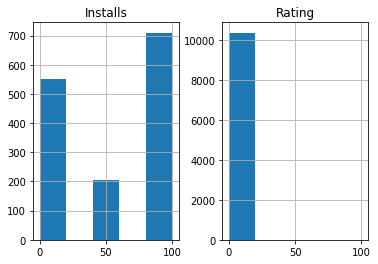

In [101]:
ds.hist(bins=5,range=(0,100))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26d9364748>,
      dtype=object)

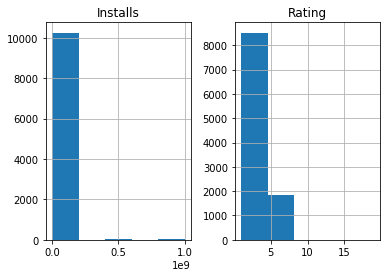

In [102]:
ds.hist(bins=5)

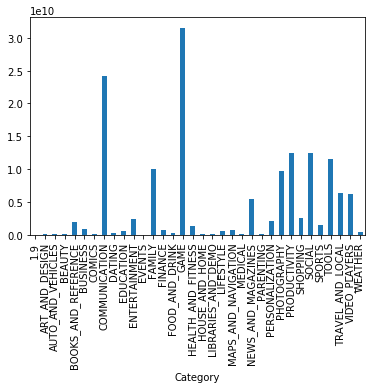

In [103]:
ds.groupby("Category")["Installs"].sum().plot(kind="bar")


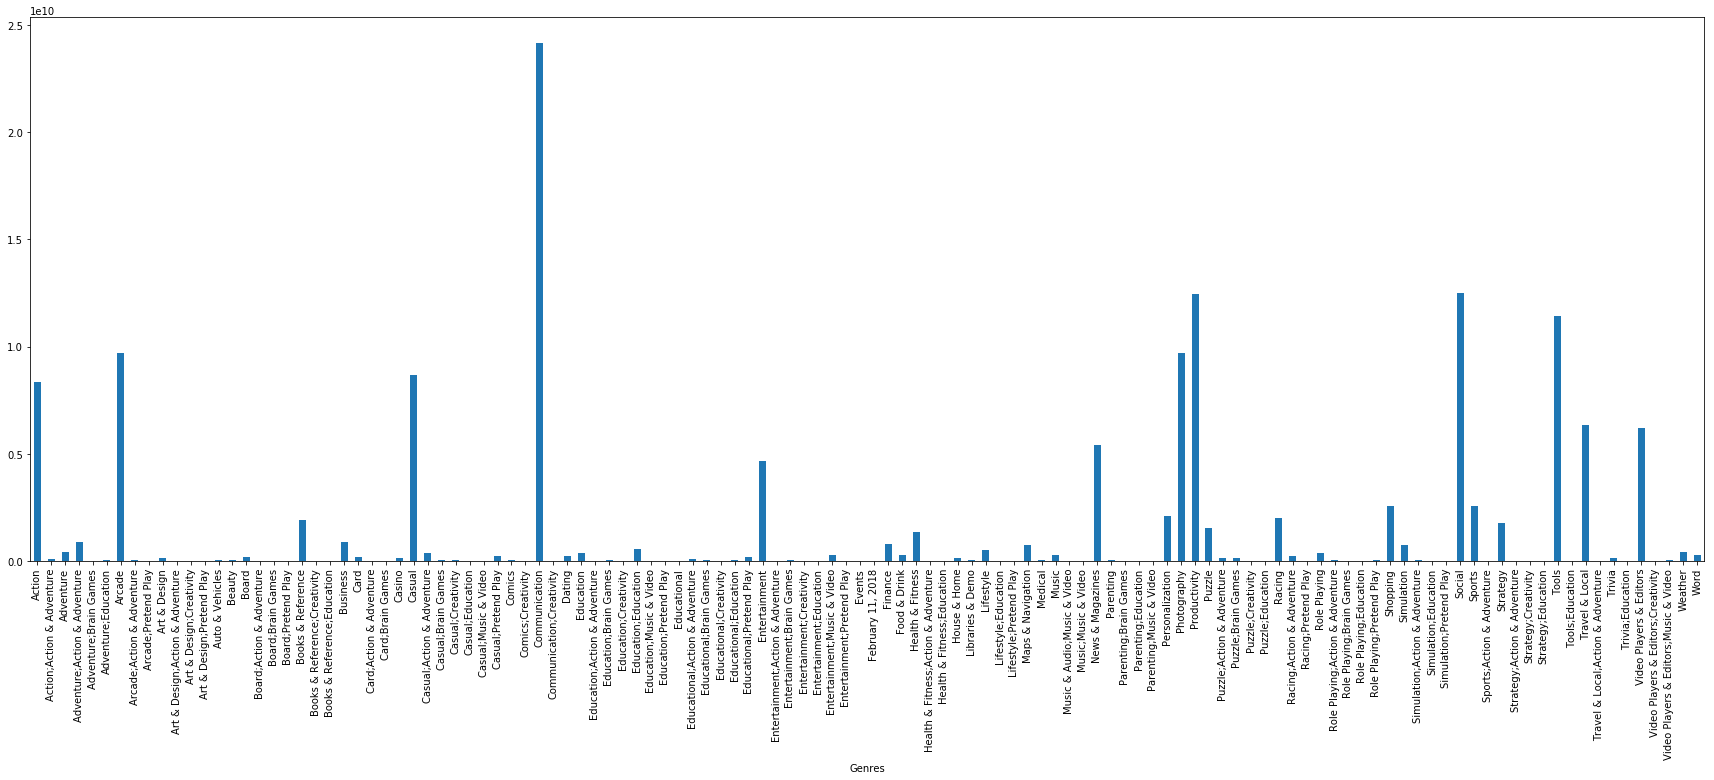

In [104]:
ds.groupby("Genres")["Installs"].sum().plot(figsize=(30,10),kind="bar")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26d8da91d0>]],
      dtype=object)

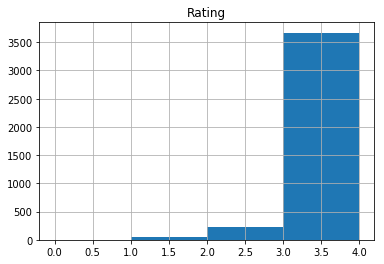

In [109]:
ds.hist("Rating",bins=range(0,6,1))